In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
health_data_path = '/content/drive/MyDrive/export.xml'

In [ ]:
from datetime import datetime
import xml.etree.ElementTree as ET

# Load the XML file
tree = ET.parse(health_data_path)
root = tree.getroot()

heartRateData = root.findall(".//Record[@type='HKQuantityTypeIdentifierHeartRate']")
stepData = root.findall(".//Record[@type='HKQuantityTypeIdentifierStepCount']")
activeEnergyBurnedData = root.findall(".//Record[@type='HKQuantityTypeIdentifierActiveEnergyBurned']")

print(len(heartRateData))
alldata = root.findall(".//Record")

types = []
for i in range(len(alldata)):
  if alldata[i].attrib['type'] not in types:
    types.append(alldata[i].attrib['type'])

print(types)

5911
['HKQuantityTypeIdentifierHeight', 'HKQuantityTypeIdentifierBodyMass', 'HKQuantityTypeIdentifierHeartRate', 'HKQuantityTypeIdentifierRespiratoryRate', 'HKQuantityTypeIdentifierStepCount', 'HKQuantityTypeIdentifierDistanceWalkingRunning', 'HKQuantityTypeIdentifierBasalEnergyBurned', 'HKQuantityTypeIdentifierActiveEnergyBurned', 'HKQuantityTypeIdentifierFlightsClimbed', 'HKQuantityTypeIdentifierAppleExerciseTime', 'HKQuantityTypeIdentifierRestingHeartRate', 'HKQuantityTypeIdentifierWalkingHeartRateAverage', 'HKQuantityTypeIdentifierEnvironmentalAudioExposure', 'HKQuantityTypeIdentifierHeadphoneAudioExposure', 'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage', 'HKQuantityTypeIdentifierSixMinuteWalkTestDistance', 'HKQuantityTypeIdentifierAppleStandTime', 'HKQuantityTypeIdentifierWalkingSpeed', 'HKQuantityTypeIdentifierWalkingStepLength', 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage', 'HKQuantityTypeIdentifierStairAscentSpeed', 'HKQuantityTypeIdentifierStairDescentSpeed',

In [ ]:
for i in range(10):
  print(heartRateData[-i-1].attrib)
print('================================')
for i in range(10):
  print(stepData[-i-1].attrib)
print('================================')
for i in range(10):
  print(activeEnergyBurnedData[-i-1].attrib)

{'type': 'HKQuantityTypeIdentifierHeartRate', 'sourceName': 'Selin’s Apple\xa0Watch', 'sourceVersion': '11.1', 'device': '<<HKDevice: 0x302e05400>, name:Apple Watch, manufacturer:Apple Inc., model:Watch, hardware:Watch6,11, software:11.1, creation date:2024-11-04 19:48:13 +0000>', 'unit': 'count/min', 'creationDate': '2024-11-20 20:47:45 +0300', 'startDate': '2024-11-20 20:42:53 +0300', 'endDate': '2024-11-20 20:42:53 +0300', 'value': '74'}
{'type': 'HKQuantityTypeIdentifierHeartRate', 'sourceName': 'Selin’s Apple\xa0Watch', 'sourceVersion': '11.1', 'device': '<<HKDevice: 0x302e05400>, name:Apple Watch, manufacturer:Apple Inc., model:Watch, hardware:Watch6,11, software:11.1, creation date:2024-11-04 19:48:13 +0000>', 'unit': 'count/min', 'creationDate': '2024-11-20 20:42:02 +0300', 'startDate': '2024-11-20 20:37:03 +0300', 'endDate': '2024-11-20 20:37:03 +0300', 'value': '73'}
{'type': 'HKQuantityTypeIdentifierHeartRate', 'sourceName': 'Selin’s Apple\xa0Watch', 'sourceVersion': '11.1',

In [ ]:
def getHourlyData():
  hourly_hr = {}
  hourly_sc = {}
  hourly_aeb = {}

  # HeartRate per hour
  for i in range(len(heartRateData )):
    start = datetime.strptime(heartRateData[i].attrib['startDate'][:13], '%Y-%m-%d %H')
    if (start not in hourly_hr):
      hourly_hr[start] = []
    hourly_hr[start].append(float(heartRateData[i].attrib['value']))

  # averaging
  for i in hourly_hr:
    hourly_hr[i] = sum(hourly_hr[i]) / len(hourly_hr[i])

  # StepCount per hour
  for i in range(len(stepData )):
    start = datetime.strptime(stepData[i].attrib['startDate'][:13], '%Y-%m-%d %H')
    if (start not in hourly_sc):
      hourly_sc[start] = 0
    hourly_sc[start] += int(stepData[i].attrib['value'])

  # ActiveEnergyBurned per hour
  for i in range(len(activeEnergyBurnedData )):
    start = datetime.strptime(activeEnergyBurnedData[i].attrib['startDate'][:13], '%Y-%m-%d %H')
    if (start not in hourly_aeb):
      hourly_aeb[start] = 0
    hourly_aeb[start] += float(activeEnergyBurnedData[i].attrib['value'])

  return hourly_hr, hourly_sc, hourly_aeb

hourly_hr, hourly_sc, hourly_aeb = getHourlyData()

In [ ]:
print(len(hourly_hr))
print(len(hourly_sc))
print(len(hourly_aeb))

hourly_cmd = {}
for i in hourly_hr:
  if (i in hourly_sc and i in hourly_aeb):
    hourly_cmd[i] = [hourly_hr[i], hourly_sc[i], hourly_aeb[i]]

for i in hourly_cmd:
  print(str(i)+': '+str(hourly_cmd[i]))
print(len(hourly_cmd))

import pandas as pd
df = pd.DataFrame.from_dict(hourly_cmd, orient='index', columns=['hearth rate', 'step count', 'active energy burned'])
df.reset_index(inplace=True)
df.rename(columns={"index": "timestamp"}, inplace=True)

print(df.head())

362
25031
9651
2024-10-27 19:00:00: [74.84615384615384, 205, 14.256]
2024-10-27 20:00:00: [70.64374615384615, 172, 10.025999999999996]
2024-10-27 22:00:00: [72.66666666666667, 163, 11.975]
2024-10-27 23:00:00: [68.91666666666667, 44, 5.026999999999999]
2024-10-28 00:00:00: [67.62146923076922, 2, 1.984]
2024-10-28 07:00:00: [63.333333333333336, 13, 2.448]
2024-10-28 08:00:00: [67.92422307692308, 45, 3.6530000000000005]
2024-10-28 09:00:00: [69.25, 18, 5.109999999999999]
2024-10-28 10:00:00: [69.16666666666667, 54, 9.889000000000001]
2024-10-28 11:00:00: [74.46153846153847, 833, 10.933]
2024-10-28 12:00:00: [92.8, 655, 25.857]
2024-10-28 13:00:00: [80.50201111111112, 303, 15.824999999999998]
2024-10-28 14:00:00: [88.3076923076923, 207, 18.876999999999995]
2024-10-28 15:00:00: [83.91666666666667, 93, 7.01]
2024-10-28 16:00:00: [80.2625, 22, 1.647]
2024-10-28 17:00:00: [77.08333333333333, 46, 7.208000000000001]
2024-10-28 18:00:00: [94.79166666666667, 894, 20.619999999999997]
2024-10-28 19

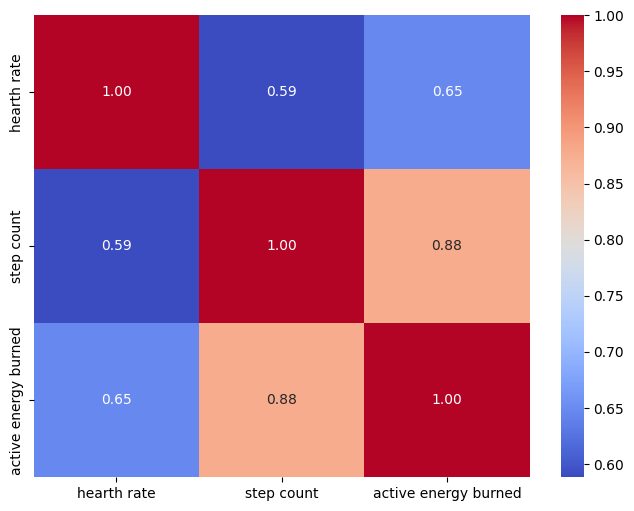

In [ ]:
corr_matrix = df.drop(columns=['timestamp']).corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
hr_values = [v[0] for v in hourly_cmd.values()]
sc_values = [v[1] for v in hourly_cmd.values()]
aeb_values = [v[2] for v in hourly_cmd.values()]

hr_normalized = [(v-min(hr_values))/(max(hr_values)-min(hr_values)) for v in hr_values]
aeb_normalized = [(v-min(aeb_values))/(max(aeb_values)-min(aeb_values)) for v in aeb_values]
sc_normalized = [(v-min(sc_values))/(max(sc_values)-min(sc_values)) for v in sc_values]

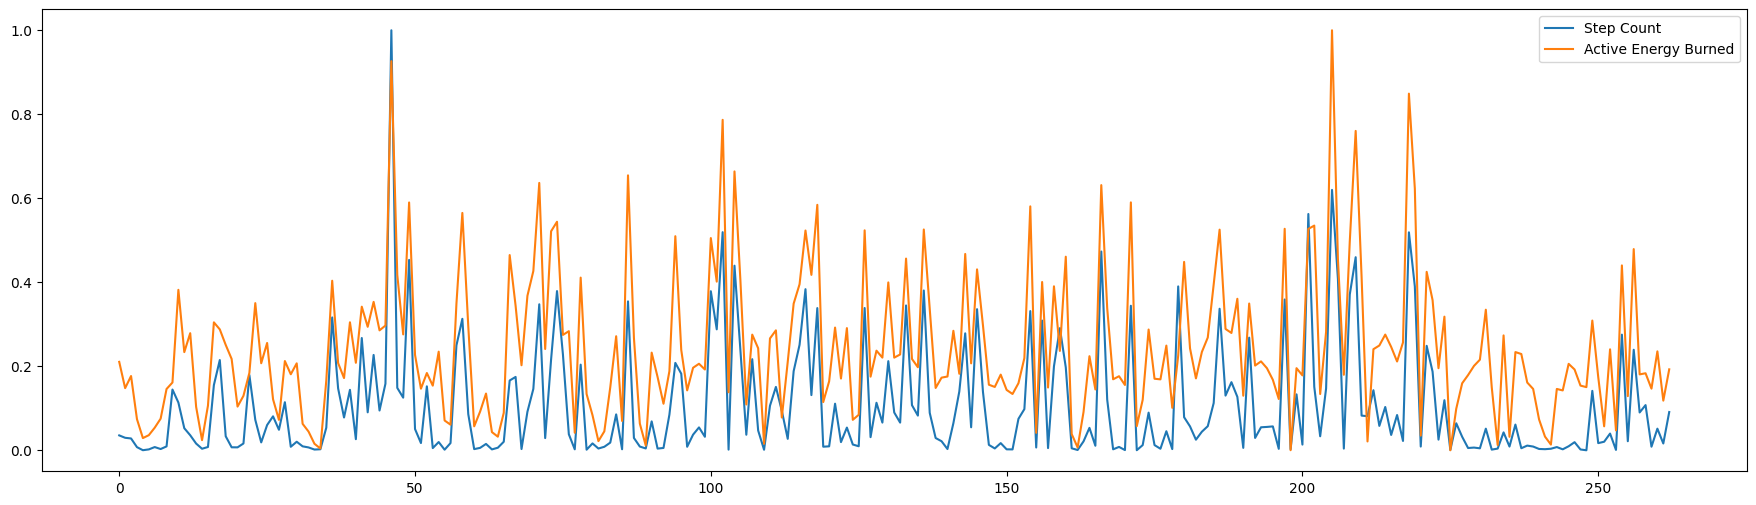

In [ ]:
plt.figure(figsize=(22, 6))

# plt.plot(hr_values, label='Hearth Rate')
plt.plot(sc_normalized, label='Step Count')
plt.plot(aeb_normalized, label='Active Energy Burned')

plt.legend()

plt.show()

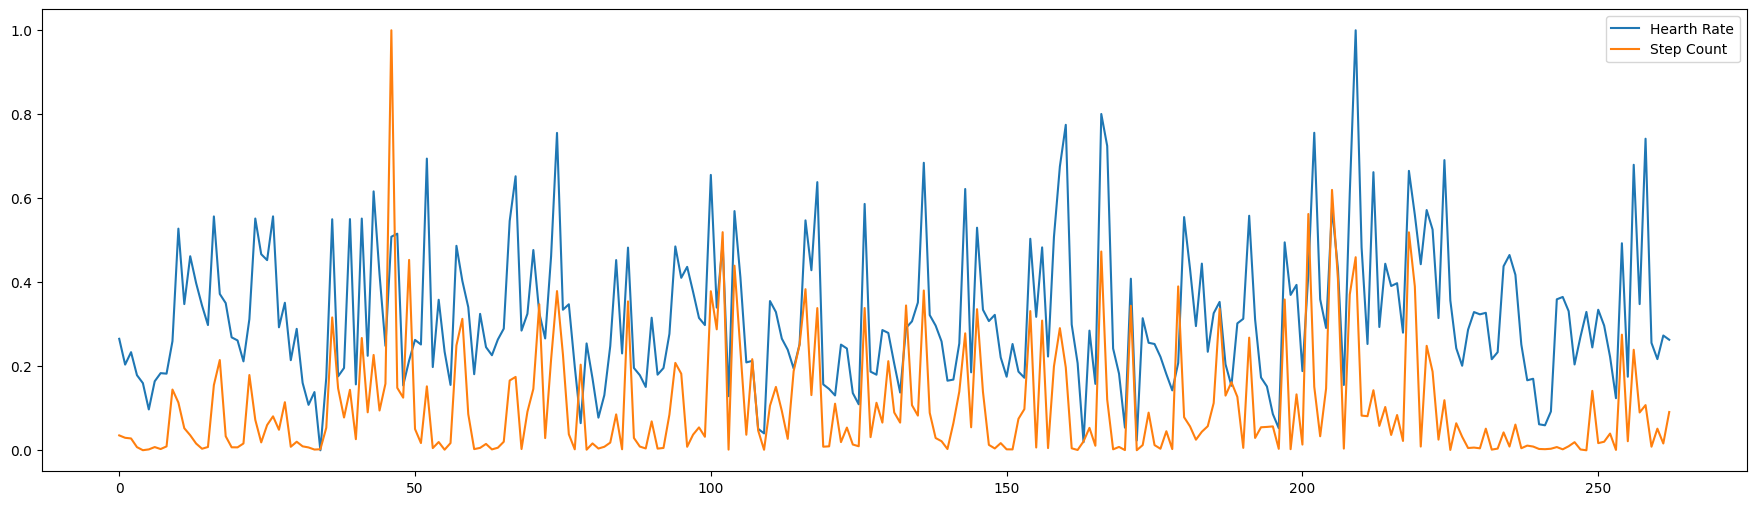

In [ ]:
plt.figure(figsize=(22, 6))

plt.plot(hr_normalized, label='Hearth Rate')
plt.plot(sc_normalized, label='Step Count')

plt.legend()

plt.show()

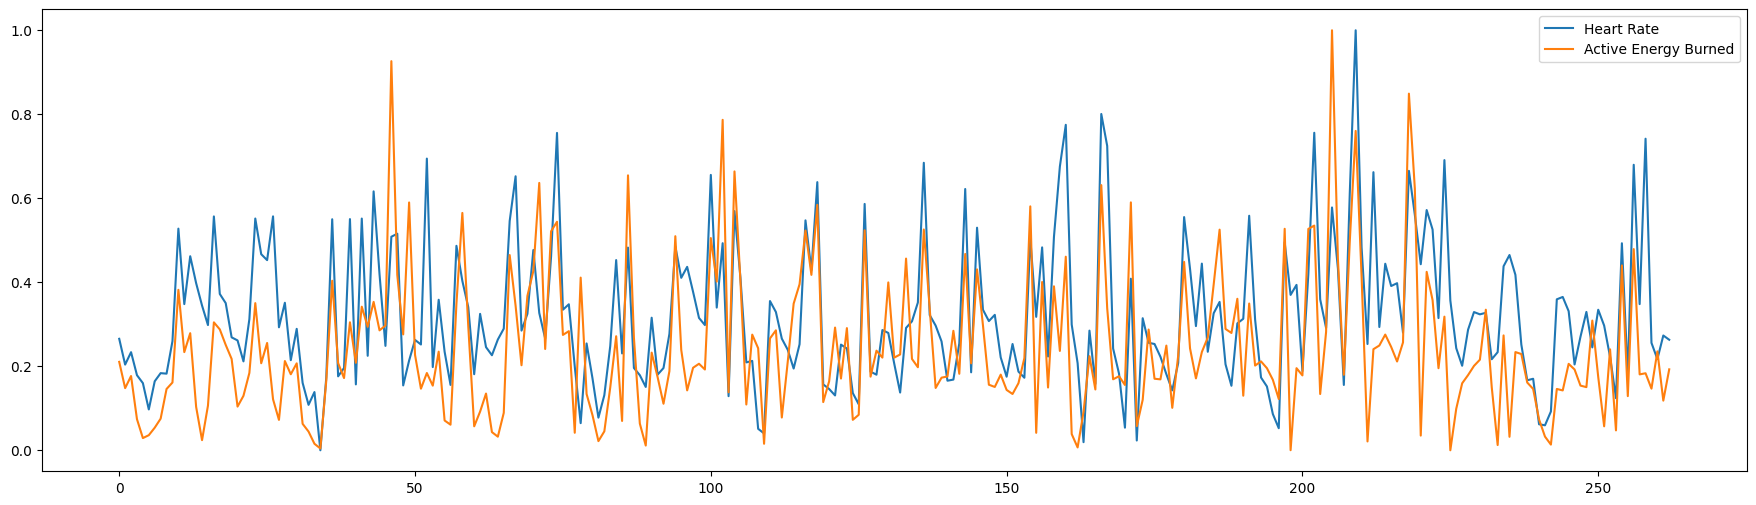

In [ ]:
plt.figure(figsize=(22, 6))

plt.plot(hr_normalized, label='Heart Rate')
plt.plot(aeb_normalized, label='Active Energy Burned')

plt.legend()

plt.show()

In [ ]:
wd = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

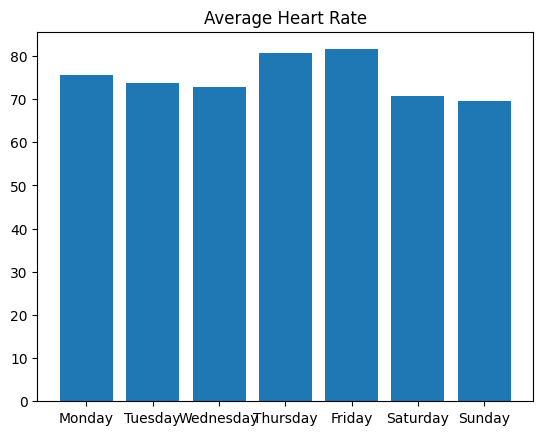

In [ ]:
hr_weekdays = {}

for key in hourly_hr:
  if (key.weekday() not in hr_weekdays):
    hr_weekdays[key.weekday()] = []
  hr_weekdays[key.weekday()].append(hourly_hr[key])

for key in hr_weekdays:
  hr_weekdays[key] = sum(hr_weekdays[key])/len(hr_weekdays[key])
plot_values = []
for i in range(7):
  plot_values.append(hr_weekdays[i])
plt.bar(wd, plot_values)
plt.title('Average Heart Rate')

plt.show()

<ipython-input-15-8b3459164e2f>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(wd, rotation=45, ha='right', fontsize=10)
<ipython-input-15-8b3459164e2f>:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(months, rotation=45, ha='right', fontsize=10)


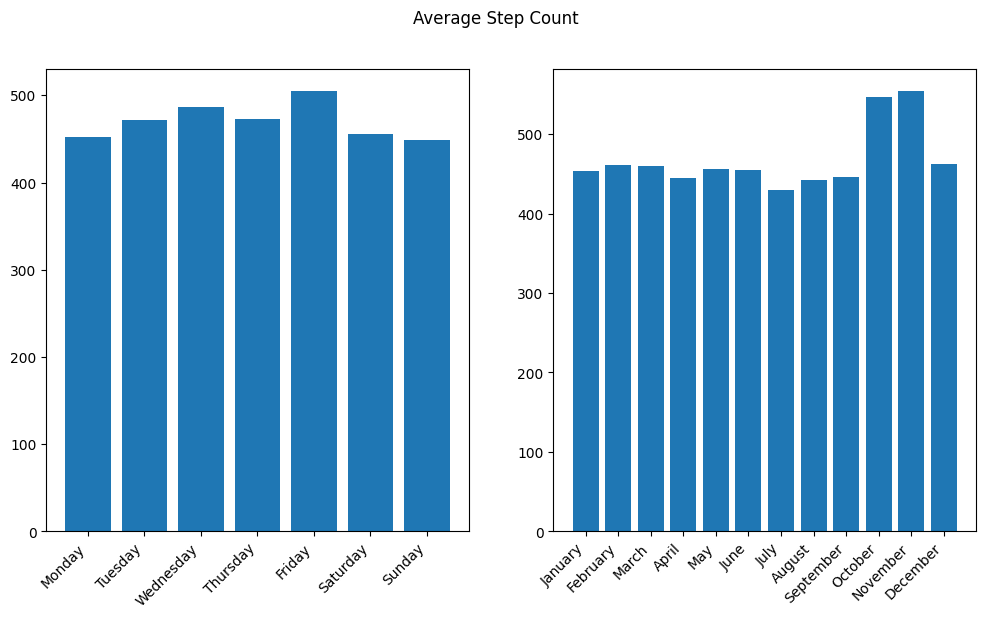

In [ ]:


sc_months = {}
sc_weekdays = {}

for key in hourly_sc:
  if (key.weekday() not in sc_weekdays):
    sc_weekdays[key.weekday()] = []
  sc_weekdays[key.weekday()].append(hourly_sc[key])
  if (key.month not in sc_months):
    sc_months[key.month] = []
  sc_months[key.month].append(hourly_sc[key])

for key in sc_weekdays:
  sc_weekdays[key] = sum(sc_weekdays[key])/len(sc_weekdays[key])
for key in sc_months:
  sc_months[key] = sum(sc_months[key])/len(sc_months[key])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Average Step Count')

plot_values = []
for i in range(7):
  plot_values.append(sc_weekdays[i])
ax1.bar(wd, plot_values)
ax1.set_xticklabels(wd, rotation=45, ha='right', fontsize=10)

plot_values = []
for i in range(12):
  plot_values.append(sc_months[i+1])
ax2.bar(months, plot_values)
ax2.set_xticklabels(months, rotation=45, ha='right', fontsize=10)

plt.show()

<ipython-input-16-ebdb236113e6>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(wd, rotation=45, ha='right', fontsize=10)
<ipython-input-16-ebdb236113e6>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(months, rotation=45, ha='right', fontsize=10)


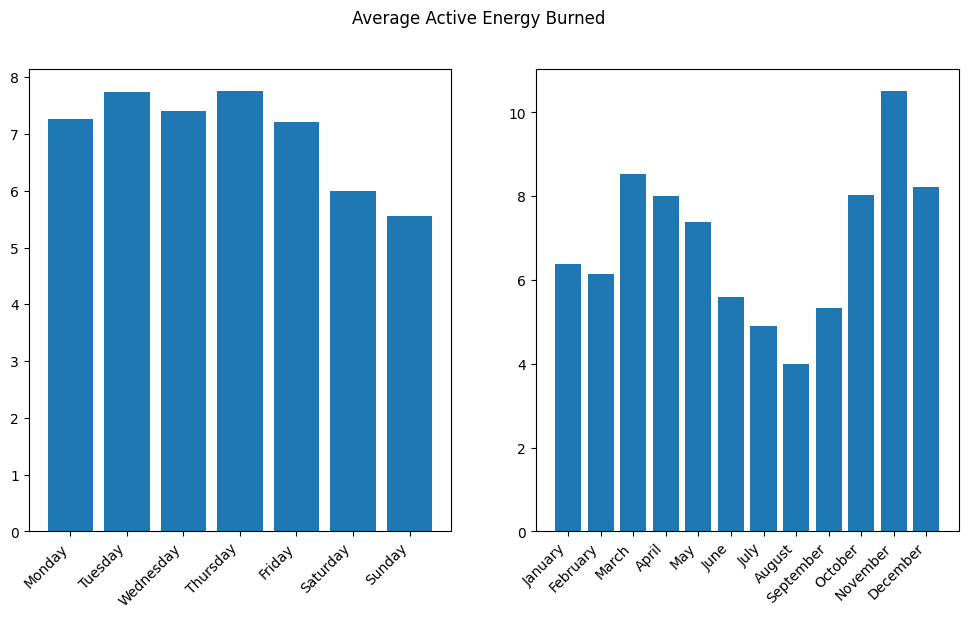

In [ ]:
aeb_months = {}
aeb_weekdays = {}

for key in hourly_aeb:
  if (key.weekday() not in aeb_weekdays):
    aeb_weekdays[key.weekday()] = []
  aeb_weekdays[key.weekday()].append(hourly_aeb[key])
  if (key.month not in aeb_months):
    aeb_months[key.month] = []
  aeb_months[key.month].append(hourly_aeb[key])

for key in aeb_weekdays:
  aeb_weekdays[key] = sum(aeb_weekdays[key])/len(aeb_weekdays[key])
for key in sc_months:
  aeb_months[key] = sum(aeb_months[key])/len(aeb_months[key])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Average Active Energy Burned')

plot_values = []
for i in range(7):
  plot_values.append(aeb_weekdays[i])
ax1.bar(wd, plot_values)
ax1.set_xticklabels(wd, rotation=45, ha='right', fontsize=10)

plot_values = []
for i in range(12):
  plot_values.append(aeb_months[i+1])
ax2.bar(months, plot_values)
ax2.set_xticklabels(months, rotation=45, ha='right', fontsize=10)

plt.show()

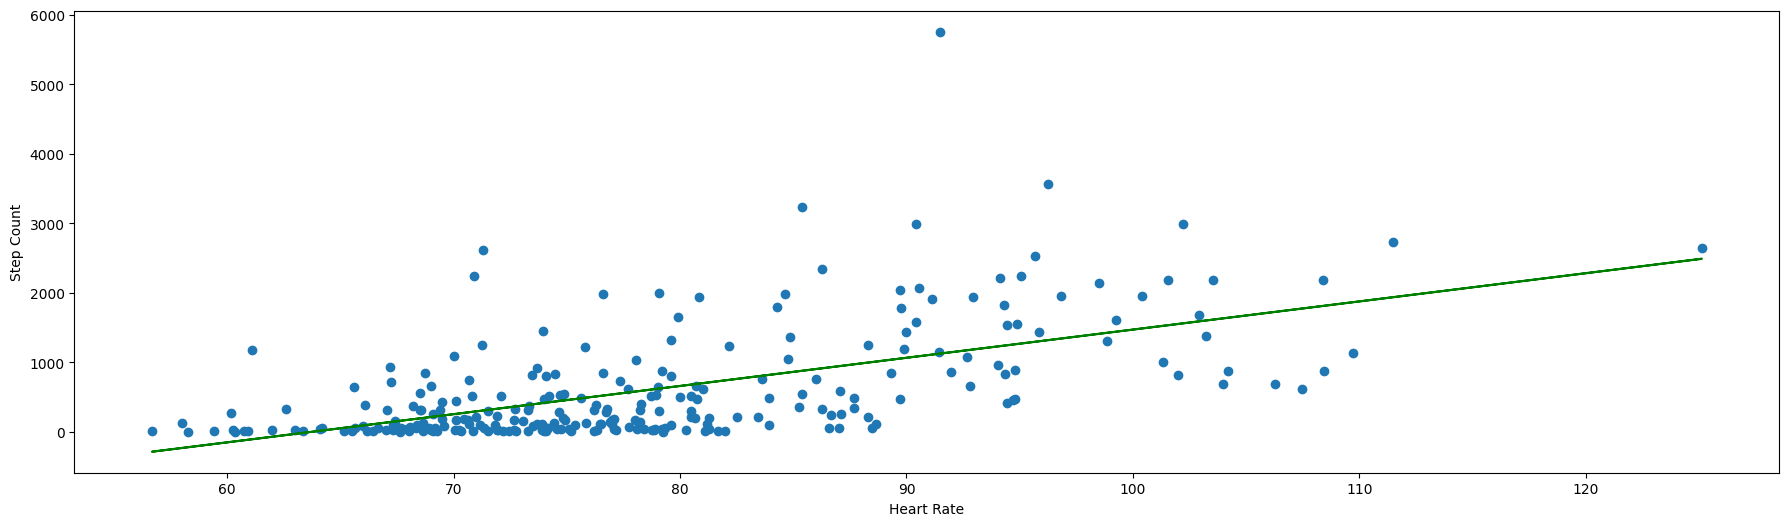

In [ ]:
import numpy as np

plt.figure(figsize=(22, 6))
plt.scatter(hr_values, sc_values, marker='o')

coefficients = np.polyfit(hr_values, sc_values, 1)
trendline = np.poly1d(coefficients)

plt.plot(hr_values, trendline(hr_values), color='green')
plt.xlabel('Heart Rate')
plt.ylabel('Step Count')
plt.show()

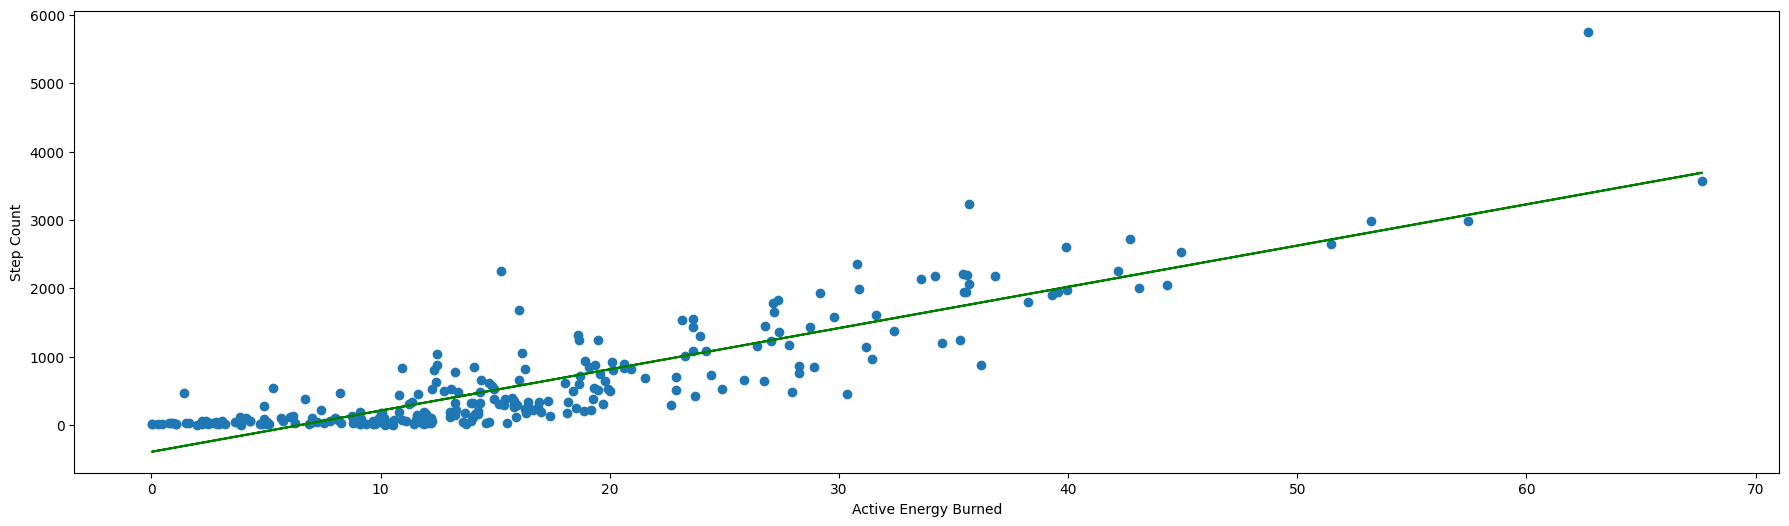

In [ ]:
plt.figure(figsize=(22, 6))
plt.scatter(aeb_values, sc_values, marker='o')

coefficients = np.polyfit(aeb_values, sc_values, 1)
trendline = np.poly1d(coefficients)

plt.plot(aeb_values, trendline(aeb_values), color='green')
plt.xlabel('Active Energy Burned')
plt.ylabel('Step Count')
plt.show()

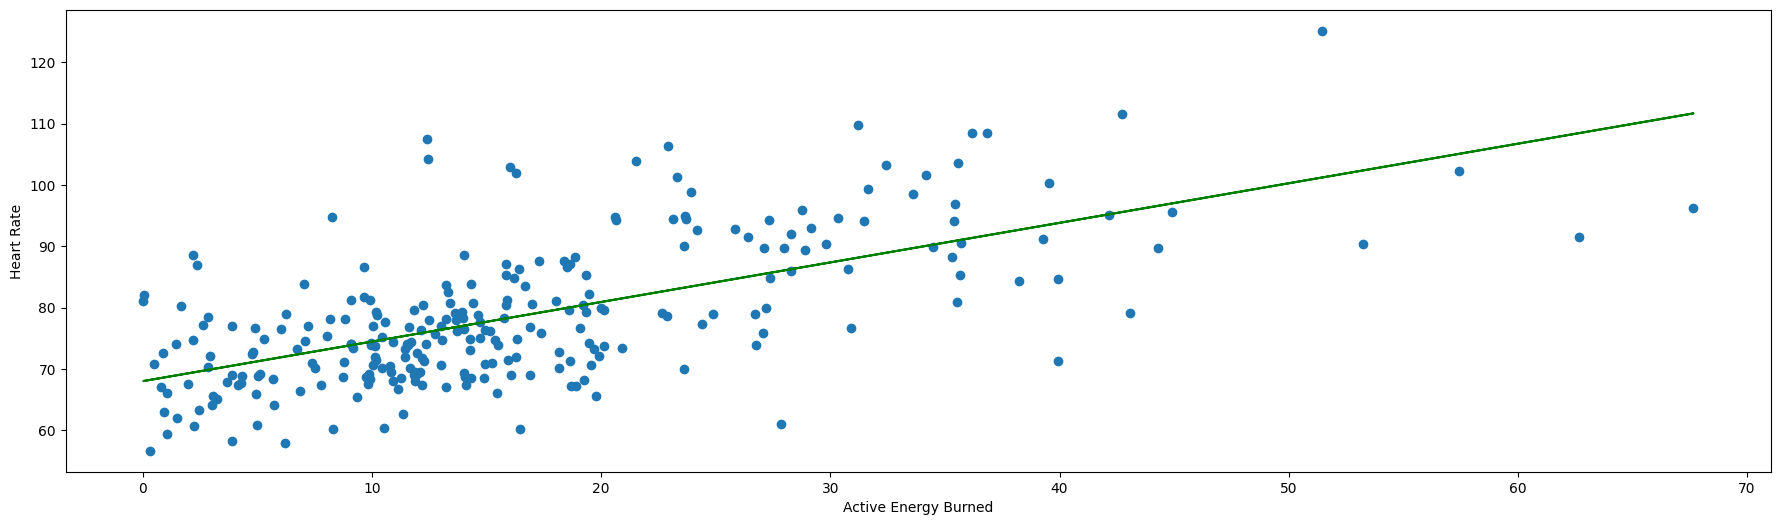

In [ ]:
plt.figure(figsize=(22, 6))
plt.scatter(aeb_values, hr_values, marker='o')

coefficients = np.polyfit(aeb_values, hr_values, 1)
trendline = np.poly1d(coefficients)

plt.plot(aeb_values, trendline(aeb_values), color='green')
plt.xlabel('Active Energy Burned')
plt.ylabel('Heart Rate')
plt.show()